<a href="https://colab.research.google.com/github/esraturkan/homeworks/blob/main/EsraTurkan_20501088_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

# GRASS.PNG 

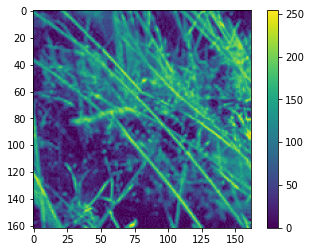

In [ ]:
grass = cv2.imread("grass.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(grass)
plt.colorbar()

# Bir Boyutlu Gauss Kernel Oluşturulması

Size 5 , variance 2 olarak belirlendi.

In [ ]:
size=5
variance=2

In [ ]:
def gaussKernel(size,variance):
  s=int(size)
  x=np.arange(-s,s+1)
  exp=np.exp(-(x**2)/(2*variance))
  return exp/np.sqrt(2*(np.pi)*variance)

1D bir kernel oluşturuldu ve sonra transpose() ile vertical hale getirildi.

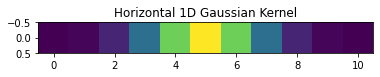

In [ ]:
gaussKernel1D=gaussKernel(size,variance)
gaussKernel1D=np.reshape(g1,(1,-1))
plt.title("Horizontal 1D Gaussian Kernel")
plt.imshow(gaussKernel1D)

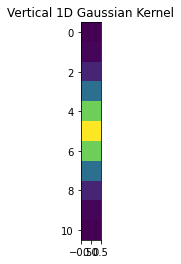

In [ ]:
gaussKernel1DTranspose=gaussKernel1D.transpose()
plt.title("Vertical 1D Gaussian Kernel")
plt.imshow(gaussKernel1DTranspose)


Görüntüye önce horizontal 1D kernel uygulandı. Ardından vertical 1D kernel uygulandı.

In [ ]:
grassFilteredGauss1DHorizontal = cv2.filter2D(grass,-1,gaussKernel1D)

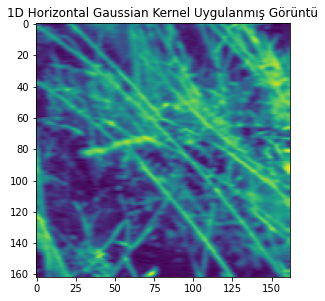

In [ ]:
fig = plt.figure(figsize=(10, 20))
fig.add_subplot(1,2,1)
plt.title('1D Horizontal Gaussian Kernel Uygulanmış Görüntü')
plt.imshow(grassFilteredGauss1DHorizontal)

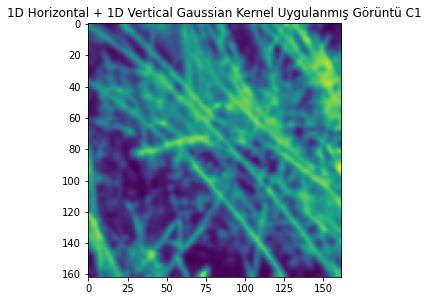

In [ ]:
c1= cv2.filter2D(grassFilteredGauss1DHorizontal,-1,gaussKernel1DTranspose)
fig = plt.figure(figsize=(10, 20))
fig.add_subplot(1,2,2)
plt.title('1D Horizontal + 1D Vertical Gaussian Kernel Uygulanmış Görüntü C1')
plt.imshow(c1)

1D Horizontal ve 1D Vertical Kernel'lara Matris Çarpımı Uygulandı

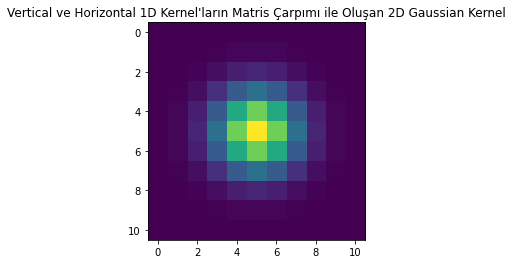

In [ ]:
gaussKernel2DFrom1D=gaussKernel1D*gaussKernel1DTranspose
plt.title("Vertical ve Horizontal 1D Kernel'ların Matris Çarpımı ile Oluşan 2D Gaussian Kernel")
plt.imshow(gaussKernel2DFrom1D)

Text(0.5, 0.92, '2 Ayrı 1D Kernel ile Oluşturulan 2D Gauss Kernel')

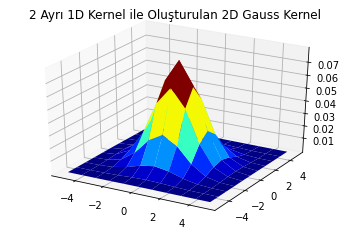

In [ ]:
fig_3d = plt.figure()
ax = fig_3d.gca(projection='3d')
X = [i for i in range(-size, size+1)]
Y = [i for i in range(-size,size+1)]
X, Y = np.meshgrid(X, Y)

surf = ax.plot_surface(X, Y, gaussKernel2DFrom1D, cmap=cm.jet)
plt.title("2 Ayrı 1D Kernel ile Oluşturulan 2D Gauss Kernel")

# 2D Gaussian Kernel Oluşturulması

In [ ]:
def gauss2DKernel(size,variance):
    x ,y=np.mgrid[-size : size+1,-size : size+1]
    

    exp= np.exp(-(x**2+y**2)/(2*variance))
    return exp/(2*(np.pi)*variance)

    
   

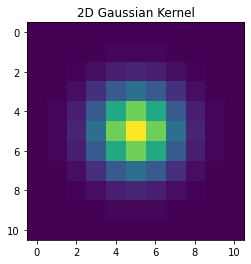

In [ ]:
gaussKernel2D=gauss2DKernel(size,variance)
plt.title("2D Gaussian Kernel")
plt.imshow(gaussKernel2D)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Text(0.5, 0.92, '2D Gaussian Kernel')

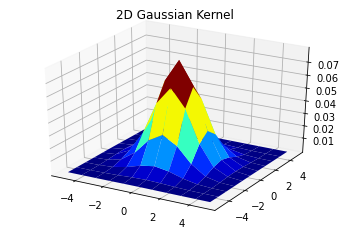

In [ ]:
fig_3d = plt.figure()
ax = fig_3d.gca(projection='3d')
X = [i for i in range(-size, size+1)]
Y = [i for i in range(-size,size+1)]
X, Y = np.meshgrid(X, Y)

surf = ax.plot_surface(X, Y, gaussKernel2D, cmap=cm.jet)
plt.title("2D Gaussian Kernel")

2D Gaussian Kernel ve Ayrı Ayrı 1D Gaussian Kernel  Karşılaştırılması

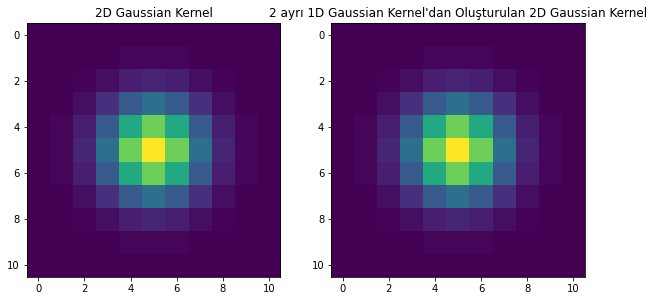

In [ ]:

fig = plt.figure(figsize=(10, 20))
fig.add_subplot(1,2,1)
plt.title("2D Gaussian Kernel")
plt.imshow(gaussKernel2D)
fig.add_subplot(1,2,2)
plt.title("2 ayrı 1D Gaussian Kernel'dan Oluşturulan 2D Gaussian Kernel")
plt.imshow(gaussKernel2DFrom1D)


Görüntüye oluşturulan 2D Gaussian Kernel Uygulandı.

In [ ]:
c2= cv2.filter2D(grass,-1,gaussKernel2D)

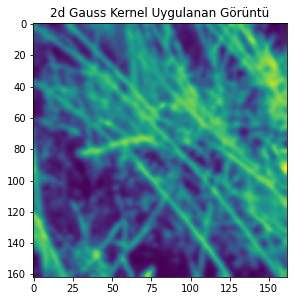

In [ ]:
fig = plt.figure(figsize=(10, 20))
fig.add_subplot(1,2,2)
plt.title("2d Gauss Kernel Uygulanan Görüntü")
plt.imshow(c2)

2D Gaussian Kernel Uygulanan Görüntü ile Ayrı Ayrı 1D Gaussian Kernel Uygulanan Görüntünün Karşılaştırılması

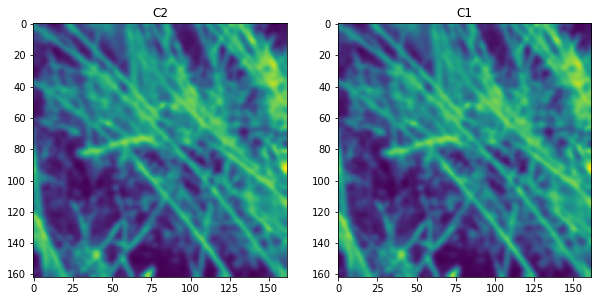

In [ ]:
fig = plt.figure(figsize=(10, 20))
fig.add_subplot(1,2,1)
plt.title("C2")
plt.imshow(c2)
fig.add_subplot(1,2,2)
plt.title("C1")
plt.imshow(c1)

Euclidean Distances

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
e=euclidean_distances(c2, c1)
print(e)

[[  3.74165739  44.68780594 145.91093174 ... 894.14540205 884.00848412
  882.30776943]
 [ 44.68780594   3.74165739 101.59232254 ... 888.99775028 880.77125294
  879.86135271]
 [145.3650577  101.99019561   4.35889894 ... 886.54328716 882.8612575
  883.79522515]
 ...
 [894.21473931 889.18783168 886.6397239  ...   3.16227766 113.84638773
  160.45871743]
 [884.0712641  880.86151011 882.84539983 ... 113.36666177   3.60555128
   48.07286137]
 [882.72759105 880.25848476 884.02601772 ... 159.68093186  46.97871859
    3.87298335]]
